In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

# Task 1.1

In [120]:
from pathlib import Path
import numpy as np

import torch
import torch.nn.functional as F


torch.manual_seed(0)

In [19]:
figure_path = Path("report/Figures")

In [3]:
from typing import Tuple

def gd_factorise_ad(A: torch.Tensor, rank: int, num_epochs=1000, lr=0.01) -> Tuple[torch.Tensor, torch.Tensor]:
    m, n = A.shape
    U = torch.rand((m, rank), requires_grad=True)
    V = torch.rand((n, rank), requires_grad=True)

    for epoch in range(num_epochs):
        
        U.grad, V.grad = None, None

        loss = F.mse_loss(A, U @ V.T, reduction='sum')

        loss.backward()

        U.data -= lr * U.grad
        V.data -= lr * V.grad

    return U, V


# Task 1.2

In [4]:
import pandas as pd

# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine−learning−databases' + '/iris/iris.data', header=None)
df = pd.read_csv('iris.data', header=None)
data = torch.tensor(df.iloc[:, [0,1,2,3]].values).float()
data = data - data.mean(dim=0)


In [26]:
U_gd, V_gd = gd_factorise_ad(data.float(), 2)
loss_gd = F.mse_loss(data, U_gd@V_gd.T, reduction='sum')
print(f'MSE Loss: {loss_gd}')

MSE Loss: 15.228853225708008


In [27]:
# truncated SVD
U_t, S_t, V_t = torch.svd(data)
S_t[-2:] = 0
A_t = U_t @ torch.diag(S_t) @ V_t.T
loss_t = F.mse_loss(data, A_t, reduction='sum')
print(f'MSE Loss: {loss_t}')

MSE Loss: 15.22883415222168


# Task 1.3

TBC

In [28]:
import matplotlib.pyplot as plt

In [ ]:
U_gd = U_gd.detach().numpy()

In [131]:
labels = df[4].to_numpy()
labels_list, labels_idx = np.unique(labels, return_inverse=True)


labels_list

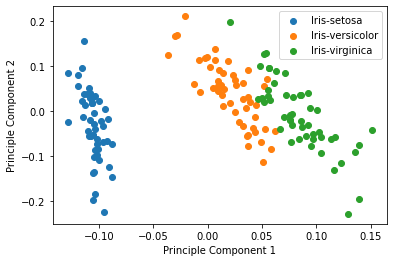

In [192]:
fig, ax = plt.subplots()
for i, label in enumerate(labels_list):
    msk = np.where(labels_idx == i)
    ax.scatter(U_t[msk, 0], U_t[msk, 1])
ax.set(xlabel='PC 0', ylabel='PC 1')
ax.set(xlabel="Principle Component 1", ylabel="Principle Component 2")
ax.legend(labels_list)

In [193]:
fig.savefig(figure_path/"pca_svd.pdf")

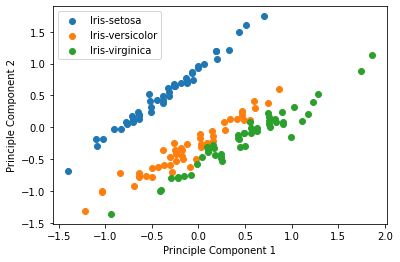

In [194]:
fig, ax = plt.subplots()
for i, label in enumerate(labels_list):
    msk = np.where(labels_idx == i)
    ax.scatter(U_gd[msk, 0], U_gd[msk, 1])
ax.set(xlabel='PC 0', ylabel='PC 1')
ax.set(xlabel="Principle Component 1", ylabel="Principle Component 2")
ax.legend(labels_list)

In [195]:
fig.savefig(figure_path/"pca_gd.pdf")